In [1]:
from pyspark.sql import SparkSession
 
spark = SparkSession.builder.appName(
    'Read CSV File into DataFrame').getOrCreate()
 
authors = spark.read.csv('scraped_tweets.csv', sep=',',
                         inferSchema=True, header=True)
 
df = authors.toPandas()
df.head()

,_c0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,crismiller12,Ecclesiastes 10:2 MAGA always! Sarcasm is my s...,Bluegrass State,3634.0,22075.0,69282,311,Starbucks will now directly pay for the killin...,[]
1,1,fiveoneonefive1,Apex Legends: orangloser,None,NaN,NaN,None,None,None,None
2,I.Q. 108,None,None,None,NaN,NaN,None,None,None,None
3,"I have herpes :(""",None,5000,180,7292.0,0.0,"@StephTheMajor those are her fins, the Starbuc...",[],None,None
4,2,mirianlupitaa,⚡️HAPPINESS 행복,SoCAL805,30.0,21.0,484,940,Maybe Starbucks some flowers and a long ass na...,[]


In [2]:
df.drop(['_c0','username','description','location','following','followers','totaltweets','retweetcount','hashtags'],inplace=True,axis=1)

In [3]:
df.dropna(inplace=True)

In [4]:
print(df.isnull().sum())

text    0
dtype: int64


In [5]:
df['text']

0      Starbucks will now directly pay for the killin...
4      Maybe Starbucks some flowers and a long ass na...
5                  starbucks always makes me feel better
6                  starbucks always makes me feel better
7      NOW: Starbucks will pay expenses for any emplo...
                             ...                        
175    Maybe Starbucks some flowers and a long ass na...
176    Might have to fuck around and try the pink dri...
177    Maybe Starbucks some flowers and a long ass na...
178    BREAKING: It’s a clean sweep! Starbucks worker...
180    @EminentProf @Starbucks Aren't the NSRB hammer...
Name: text, Length: 90, dtype: object

In [6]:
feedback=list(df['text'])

In [7]:
feedback

['Starbucks will now directly pay for the killing of unborn human beings through abortion. https://t.co/1T1Z6GshZS',
 'Maybe Starbucks some flowers and a long ass nap will cheer me up',
 'starbucks always makes me feel better',
 'starbucks always makes me feel better',
 'NOW: Starbucks will pay expenses for any employee forced to travel for an abortion.',
 'how Starbucks never gives me light ice',
 'BREAKING: It’s a clean sweep! Starbucks workers in Portland, OR have won all four of their union elections today.',
 'Cheers to always choosing chocolate. 🍫✨ Chocolate Cream Cold Brew. https://t.co/nOez4GjSah',
 'The union steamrolls over Starbucks once again, winning all 4 vote counts today in Portland, Oregon',
 'walked to starbucks on my break idk what to get',
 'Starbucks will now directly pay for the killing of unborn human beings through abortion. https://t.co/1T1Z6GshZS',
 'Pretty messed up that @Starbucks continues to fire workers orrganizing for better conditions on the job. They j

In [8]:
from textblob import TextBlob
polarity=[]
sentiment=[]
p=0
n=0
neu=0
for a in feedback:
    pol= TextBlob(a).polarity
    if pol>0:
        sentiment.append("POSITIVE")
        p=p+1
    elif pol<0:
        sentiment.append("NEGATIVE")
        n=n+1
    else:
        sentiment.append("NEUTRAL")
        neu=neu+1

    polarity.append(pol)

In [9]:
df['sentiment']=sentiment
print(df['sentiment'])

0      POSITIVE
4      NEGATIVE
5      POSITIVE
6      POSITIVE
7      NEGATIVE
         ...   
175    NEGATIVE
176    NEGATIVE
177    NEGATIVE
178    POSITIVE
180     NEUTRAL
Name: sentiment, Length: 90, dtype: object


In [10]:
print(polarity)

[0.05, -0.05, 0.5, 0.5, -0.30000000000000004, 0.4, 0.45833333333333337, -0.6, 0.5, 0.0, 0.05, 0.29545454545454547, 0.0, 0.0, -0.05, -0.05, 0.0, -0.3333333333333333, 0.0, -0.05, 0.0, -0.05, -0.2785714285714286, -0.7999999999999999, -0.05, 0.5, 0.0, -0.15, 0.25, 0.5, -0.05, 0.0, -0.07142857142857142, 0.0, 0.8, -0.05, 0.0, 0.0, 0.25, -0.05, 0.0, -0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.08333333333333333, 0.0, 0.0, 0.05357142857142857, 0.5, 0.0, -0.05, 0.0, -0.05, 0.44285714285714284, -0.4, 0.0, 0.8, -0.05, 0.0, 0.0, 0.0, 0.8, 0.9099999999999999, -0.5, 0.0, 0.0, -0.05, 0.25, -0.05, 0.0, -0.2, 0.0, -0.6, 0.45833333333333337, -0.05, 0.09680134680134682, -0.05, 0.0, 0.0, 0.2333333333333333, -0.05, -0.25, -0.05, 0.45833333333333337, 0.0]


In [11]:
df.head(10)

,text,sentiment
0,Starbucks will now directly pay for the killin...,POSITIVE
4,Maybe Starbucks some flowers and a long ass na...,NEGATIVE
5,starbucks always makes me feel better,POSITIVE
6,starbucks always makes me feel better,POSITIVE
7,NOW: Starbucks will pay expenses for any emplo...,NEGATIVE
8,how Starbucks never gives me light ice,POSITIVE
9,BREAKING: It’s a clean sweep! Starbucks worker...,POSITIVE
11,Cheers to always choosing chocolate. 🍫✨ Chocol...,NEGATIVE
12,The union steamrolls over Starbucks once again...,POSITIVE
18,walked to starbucks on my break idk what to get,NEUTRAL


In [12]:
df['sentiment'].unique()

array(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], dtype=object)

In [13]:
dic={'POSITIVE':0,'NEGATIVE':0,'NEUTRAL':0}
for i in df['sentiment']:
    dic[i]=dic[i]+1

In [14]:
print(dic)

{'POSITIVE': 26, 'NEGATIVE': 31, 'NEUTRAL': 33}


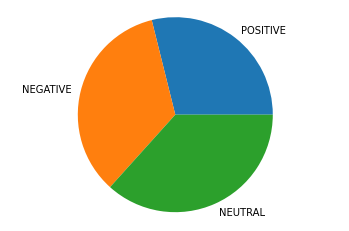

In [17]:
import matplotlib.pyplot as plt
labels=[]
sizes=[]
for x,y in dic.items():
    labels.append(x)
    sizes.append(y)
plt.pie(sizes,labels=labels)
plt.axis('equal')
plt.show()

In [16]:
!pip install matplotlib

     |████████████████████████████████| 11.3 MB 132 kB/s eta 0:00:01
     |████████████████████████████████| 930 kB 218 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 200 kB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 93 kB/s  eta 0:00:01
     |████████████████████████████████| 98 kB 464 kB/s eta 0:00:01
     |████████████████████████████████| 40 kB 435 kB/s eta 0:00:01
